## Handwriting Recognition using K-Means
The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

- ATMs can recognize handwritten bank checks
- Evernote can recognize handwritten task lists
- Expensify can recognize handwritten receipts

But how do they do it?

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from mlxtend.data import loadlocal_mnist
import platform

## Getting Started with the Digits Dataset:

When first starting out with a dataset, it’s always a good idea to go through the data description and see what you can already learn.

In [ ]:
digits = datasets.load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# Let’s see what the data looks like!
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
# Next, print out the target values in
print(digits.target)

[0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

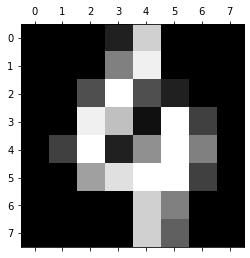

In [ ]:
# Let’s visualize the image at index 100:
plt.gray() 

plt.matshow(digits.images[100])

plt.show()

Is it a 4? Let’s print out the target label at index 100 to find out!



## To take a look at 64 sample images. Copy and paste the code below:

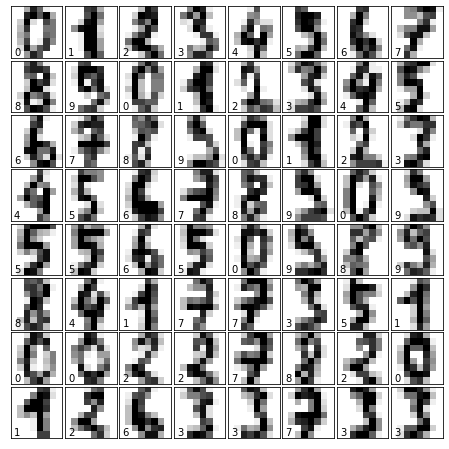

In [ ]:
# Figure size (width, height)
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

## K-Means Clustering:

In [ ]:
# Now we understand what we are working with. Let’s cluster the 1797 different digit images into groups.

from sklearn.cluster import KMeans
# Because there are 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, and 9), there should be 10 clusters.
model = KMeans(n_clusters=10, random_state = 42) # So k, the number of clusters, is 10:
# The random_state will ensure that every time you run your code, the model is built in the same way. This can be any number. We used random_state = 42.
model.fit(digits.data) # Use the .fit() method to fit the digits.data to the model.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


## Visualizing after K-Means:


Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

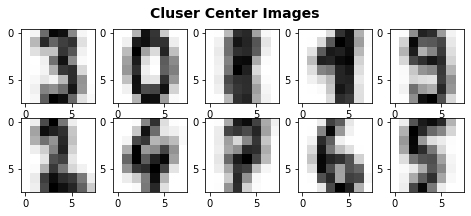

In [ ]:
fig = plt.figure(figsize=(8, 3))
 
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')


#  Scikit-learn sometimes calls centroids “cluster centers”.
for i in range(10):
 
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
# The cluster centers should be a list with 64 values (0-16). Here, we are making each of the cluster centers into an 8x8 2D array.

plt.show()

## Testing Your Model:
After going to test.html (http://localhost:8000/test.html) in codecademy, I used my mouse to write a digit in each of the boxes ie 1137

In [ ]:
new_samples = np.array([[0.00,0.00,0.00,2.67,1.53,0.00,0.00,0.00,0.00,0.00,0.00,6.86,4.57,0.00,0.00,0.00,0.00,0.00,0.00,6.86,4.57,0.00,0.00,0.00,0.00,0.00,0.00,6.86,4.58,0.00,0.00,0.00,0.00,0.00,0.00,6.86,4.58,0.00,0.00,0.00,0.00,0.00,0.00,6.86,4.58,0.00,0.00,0.00,0.00,0.00,0.00,6.40,4.11,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.15,0.00,0.00,0.00],
[0.00,0.00,0.00,2.29,1.91,0.00,0.00,0.00,0.00,0.00,0.00,6.10,5.33,0.00,0.00,0.00,0.00,0.00,0.00,6.09,5.33,0.00,0.00,0.00,0.00,0.00,0.00,6.09,5.41,0.00,0.00,0.00,0.00,0.00,0.00,5.41,6.10,0.00,0.00,0.00,0.00,0.00,0.00,4.80,6.94,0.00,0.00,0.00,0.00,0.00,0.00,2.90,6.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,1.14,4.88,6.56,6.87,4.66,0.15,0.00,0.00,2.67,6.71,5.27,4.88,7.63,3.44,0.00,0.00,0.00,0.46,2.98,5.26,7.63,4.50,0.00,0.00,0.00,3.28,7.63,7.63,7.40,2.52,0.00,0.00,0.00,0.08,1.83,4.20,7.09,7.10,0.54,0.00,0.00,0.00,0.00,0.23,3.14,7.63,3.43,1.14,6.02,6.10,6.33,7.63,7.62,7.40,2.44,0.68,4.50,4.58,4.58,3.89,2.29,0.53,0.00],
[0.00,2.98,3.21,1.15,0.76,0.77,0.46,0.00,0.00,6.11,7.63,7.63,7.63,7.64,7.17,0.00,0.00,0.00,0.99,2.29,2.37,7.25,6.10,0.00,0.00,0.00,0.00,0.00,2.67,7.63,2.37,0.00,0.00,0.00,0.00,0.61,6.71,6.41,0.08,0.00,0.00,0.00,0.00,4.65,7.47,1.45,0.00,0.00,0.00,0.00,1.68,7.55,4.43,0.00,0.00,0.00,0.00,0.00,5.95,7.33,0.39,0.00,0.00,0.00]
])

But wait, because this is a clustering algorithm, we don’t know which label is which.

By looking at the cluster centers, let’s map out each of the labels with the digits we think it represents:

In [ ]:
new_labels = model.predict(new_samples) # loop through labels to print the predicted
print(new_labels) 

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

[7 7 0 7]
5505